In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
 
from sklearn.model_selection import train_test_split 

import torchvision.models as models

In [2]:
train_df = pd.read_csv('train.csv') 

#와인 품종 데이터 : wine_target
train_df = pd.DataFrame(train_df)  

wine_target =train_df['label'] #DataFrame

df_attr = train_df.drop(['label'],axis=1) 

#설명변수 wine_data, 목적변수 wine_target
wine_data = df_attr[0:2000]
wine_target = wine_target[0:2000]
#Splitting  
x_train, x_test, y_train, y_test = train_test_split(wine_data, wine_target,test_size=0.3)
 
#Numpy
x_train = np.array(x_train).astype(np.float32)
y_train = np.array(y_train).astype(np.longlong)
x_test = np.array(x_test).astype(np.float32)
y_test = np.array(y_test).astype(np.longlong)


#Tensor
x_train = torch.from_numpy(x_train).float() 
y_train = torch.from_numpy(y_train).long() 
x_test = torch.from_numpy(x_test).float() 
y_test = torch.from_numpy(y_test).long()
 
train = TensorDataset(x_train, y_train)

train_loader = DataLoader(train, batch_size = 16, shuffle=True)
    
'''
print(x_train.shape)
print(x_train)
print(y_train.shape)
print(y_train)
print(x_test.shape)
print(x_test)
print(y_test.shape)
print(y_test) 

for x, y in train_loader:
    print(x, y)

'''


'\nprint(x_train.shape)\nprint(x_train)\nprint(y_train.shape)\nprint(y_train)\nprint(x_test.shape)\nprint(x_test)\nprint(y_test.shape)\nprint(y_test) \n\nfor x, y in train_loader:\n    print(x, y)\n\n'

In [3]:
 class Net(nn.Module):

    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(12,96)
        self.fc2 = nn.Linear(96,96) 
        self.fc3 = nn.Linear(96,96) 
        self.fc4 = nn.Linear(96,96) 
        self.fc5 = nn.Linear(96,96) 
        self.fc6 = nn.Linear(96,96) 
        self.dropout = nn.Dropout(0.25)
        self.fc10 = nn.Linear(96,2)
    
 
    def forward(self, x):
        x = F.relu(self.fc1(x)) 
        
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))  
        x = (self.dropout(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x)) 
        x = F.relu(self.fc6(x))
        x = (self.dropout(x)) 
        x = self.fc10(x)
        return F.log_softmax(x, dim=1)
    
    def predict(self, x):
        with torch.no_grad():
            x = self.forward(x)
        return x

    def accuracy(self, x, t):
        y = self.predict(x)
        y = torch.argmax(y, dim=1)
        if t.ndim != 1:
            t = torch.argmax(t, dim=1)
        accuracy = torch.sum(y == t).item() / float(x.shape[0])
        return accuracy

In [4]:
model = Net()
 

#오차함수(교차엔트로피)
criterion = nn.CrossEntropyLoss()
#최적화를 담당할 객체 -> 아담
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
#optimizer = optim.SGD(model.parameters(),lr=0.01)

loss_list = []
train_acc_list = []
test_acc_list = []
loss_avg = []

# 200번의 반복으로 학습
for epoch in range(200):
    total_loss = 0
    
    # 분할한 데이터를 가져옴
    for x_train, y_train in train_loader:     
        # 경사 초기화
        optimizer.zero_grad()
        #forwarding
        output = model(x_train)
        #오차 계산
        loss = criterion(output, y_train) 
        #backpropagation
        loss.backward()
        #가중치 업데이트
        optimizer.step()
        #누적 오차 계산
        total_loss += loss.item()
        
        #100회마다 누적 오차 계산
        if (epoch+1) % 100 == 0:    
            print(f"=== Epoch : {epoch+1}  ===") 
            print(f"Total_Loss : {total_loss}") 

    train_acc = model.accuracy(x_train, y_train)
    test_acc = model.accuracy(x_test, y_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

    # 에폭별 평균 손실을 계산하여 리스트에 추가
    epoch_loss = total_loss / len(train_loader)
    loss_avg.append(epoch_loss)
    if epoch % 10 ==0:
        print("==============================")
    print("Epoch: {}, Loss: {:.4f}".format(epoch, total_loss / len(train_loader))) #평균 손실을 출력


train acc:0.75, test acc:0.7716666666666666
Epoch: 0, Loss: 0.5798
train acc:0.875, test acc:0.8616666666666667
Epoch: 1, Loss: 0.4804
train acc:0.875, test acc:0.8683333333333333
Epoch: 2, Loss: 0.3463
train acc:1.0, test acc:0.875
Epoch: 3, Loss: 0.2833
train acc:0.75, test acc:0.8816666666666667
Epoch: 4, Loss: 0.2670
train acc:1.0, test acc:0.8866666666666667
Epoch: 5, Loss: 0.2606
train acc:1.0, test acc:0.885
Epoch: 6, Loss: 0.2575
train acc:0.625, test acc:0.875
Epoch: 7, Loss: 0.2582
train acc:1.0, test acc:0.8916666666666667
Epoch: 8, Loss: 0.2420
train acc:0.875, test acc:0.89
Epoch: 9, Loss: 0.2437
train acc:1.0, test acc:0.895
Epoch: 10, Loss: 0.2303
train acc:0.875, test acc:0.895
Epoch: 11, Loss: 0.2271
train acc:1.0, test acc:0.905
Epoch: 12, Loss: 0.2181
train acc:1.0, test acc:0.9166666666666666
Epoch: 13, Loss: 0.2130
train acc:0.75, test acc:0.9033333333333333
Epoch: 14, Loss: 0.2013
train acc:1.0, test acc:0.8966666666666666
Epoch: 15, Loss: 0.1973
train acc:1.0, te

=== Epoch : 100  ===
Total_Loss : 5.602045634062961
=== Epoch : 100  ===
Total_Loss : 5.8180205908138305
=== Epoch : 100  ===
Total_Loss : 5.882681207032874
=== Epoch : 100  ===
Total_Loss : 5.912709665717557
=== Epoch : 100  ===
Total_Loss : 5.940998734207824
=== Epoch : 100  ===
Total_Loss : 6.192436308832839
=== Epoch : 100  ===
Total_Loss : 6.200268666492775
=== Epoch : 100  ===
Total_Loss : 6.45831201528199
=== Epoch : 100  ===
Total_Loss : 6.549274730728939
=== Epoch : 100  ===
Total_Loss : 6.586155104683712
=== Epoch : 100  ===
Total_Loss : 6.601254783803597
=== Epoch : 100  ===
Total_Loss : 6.685143515700474
=== Epoch : 100  ===
Total_Loss : 6.7281002218369395
=== Epoch : 100  ===
Total_Loss : 6.75851777032949
=== Epoch : 100  ===
Total_Loss : 6.806841647485271
=== Epoch : 100  ===
Total_Loss : 6.9322803823743016
=== Epoch : 100  ===
Total_Loss : 6.946217727148905
=== Epoch : 100  ===
Total_Loss : 6.964403251418844
train acc:1.0, test acc:0.9583333333333334
Epoch: 99, Loss: 0.0

=== Epoch : 200  ===
Total_Loss : 3.2496737599140033
=== Epoch : 200  ===
Total_Loss : 3.261257294914685
=== Epoch : 200  ===
Total_Loss : 3.2678433562396094
=== Epoch : 200  ===
Total_Loss : 3.2788004277972504
=== Epoch : 200  ===
Total_Loss : 3.309478899347596
=== Epoch : 200  ===
Total_Loss : 3.3148707885993645
=== Epoch : 200  ===
Total_Loss : 3.9044394035590813
=== Epoch : 200  ===
Total_Loss : 3.9183377547888085
=== Epoch : 200  ===
Total_Loss : 3.9209651382407174
=== Epoch : 200  ===
Total_Loss : 4.141361597343348
=== Epoch : 200  ===
Total_Loss : 4.454964134260081
=== Epoch : 200  ===
Total_Loss : 4.45977382210549
=== Epoch : 200  ===
Total_Loss : 4.579984834766947
=== Epoch : 200  ===
Total_Loss : 4.620237661874853
train acc:1.0, test acc:0.96
Epoch: 199, Loss: 0.0525


0.9616666666666667


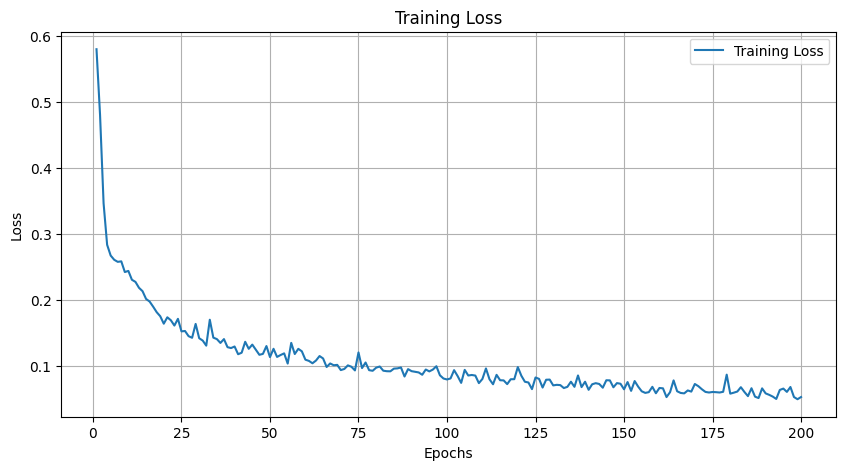

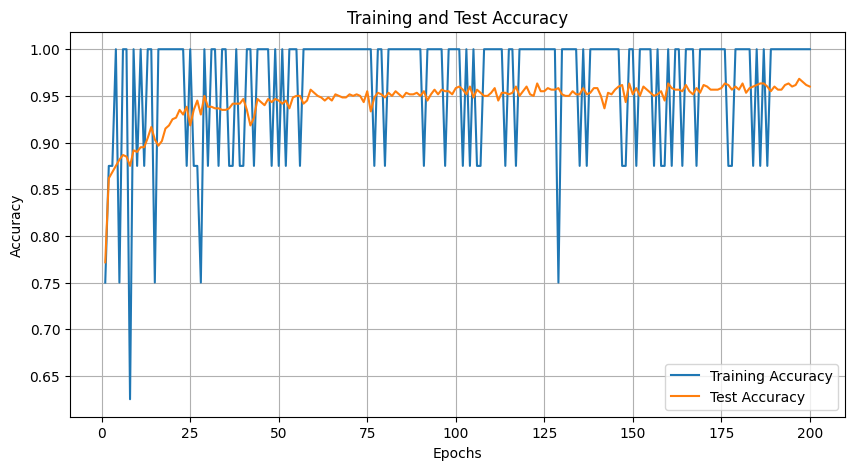

Net(
  (fc1): Linear(in_features=12, out_features=96, bias=True)
  (fc2): Linear(in_features=96, out_features=96, bias=True)
  (fc3): Linear(in_features=96, out_features=96, bias=True)
  (fc4): Linear(in_features=96, out_features=96, bias=True)
  (fc5): Linear(in_features=96, out_features=96, bias=True)
  (fc6): Linear(in_features=96, out_features=96, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc10): Linear(in_features=96, out_features=2, bias=True)
)


In [5]:
#출력이 0 혹은 1이 되게 함
result = torch.max(model(x_test).data,1)[1]

#모형의 정확도 측정
accuracy=sum(y_test.data.numpy()==result.numpy())/len(y_test.data.numpy())

#모형의 정확도 출력
print(accuracy)

# Loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss_avg) + 1), loss_avg, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_acc_list) + 1), train_acc_list, label='Training Accuracy')
plt.plot(range(1, len(test_acc_list) + 1), test_acc_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print(model)

In [6]:
torch.save(model, 'model_state_dict.pt')
loaded_model = torch.load('model_state_dict.pt')

In [7]:
model = torch.load('model_state_dict.pt')
model.eval()


Net(
  (fc1): Linear(in_features=12, out_features=96, bias=True)
  (fc2): Linear(in_features=96, out_features=96, bias=True)
  (fc3): Linear(in_features=96, out_features=96, bias=True)
  (fc4): Linear(in_features=96, out_features=96, bias=True)
  (fc5): Linear(in_features=96, out_features=96, bias=True)
  (fc6): Linear(in_features=96, out_features=96, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc10): Linear(in_features=96, out_features=2, bias=True)
)

In [8]:
test_df = pd.read_csv('test_open-Copy1.csv')

train_df = pd.DataFrame(test_df)  

wine_target =train_df['label'] #DataFrame

df_attr = train_df.drop(['label'],axis=1)  
wine_data = df_attr[0:100]
wine_target = wine_target[0:100]
x_train, x_test, y_train, y_test = train_test_split(wine_data, wine_target,test_size=0.2)
x_train = np.array(x_train).astype(np.float32)
y_train = np.array(y_train).astype(np.longlong)
x_test = np.array(x_test).astype(np.float32)
y_test = np.array(y_test).astype(np.longlong)


#Tensor
x_train = torch.from_numpy(x_train).float() 
y_train = torch.from_numpy(y_train).long() 
x_test = torch.from_numpy(x_test).float() 
y_test = torch.from_numpy(y_test).long()
 
train = TensorDataset(x_train, y_train)

train_loader = DataLoader(train, batch_size = 16, shuffle=True)

In [9]:
model = Net()
 

#오차함수(교차엔트로피)
criterion = nn.CrossEntropyLoss()
#최적화를 담당할 객체 -> 아담
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
#optimizer = optim.SGD(model.parameters(),lr=0.01)

loss_list = []
train_acc_list = []
test_acc_list = []
loss_avg = []

# 200번의 반복으로 학습
for epoch in range(200):
    total_loss = 0
    
    # 분할한 데이터를 가져옴
    for x_train, y_train in train_loader:     
        # 경사 초기화
        optimizer.zero_grad()
        #forwarding
        output = model(x_train)
        #오차 계산
        loss = criterion(output, y_train) 
        #backpropagation
        loss.backward()
        #가중치 업데이트
        optimizer.step()
        #누적 오차 계산
        total_loss += loss.item()
        
        #100회마다 누적 오차 계산
        if (epoch+1) % 100 == 0:    
            print(f"=== Epoch : {epoch+1}  ===") 
            print(f"Total_Loss : {total_loss}") 

    train_acc = model.accuracy(x_train, y_train)
    test_acc = model.accuracy(x_test, y_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

    # 에폭별 평균 손실을 계산하여 리스트에 추가
    epoch_loss = total_loss / len(train_loader)
    loss_avg.append(epoch_loss)
    if epoch % 10 ==0:
        print("==============================")
    print("Epoch: {}, Loss: {:.4f}".format(epoch, total_loss / len(train_loader))) #평균 손실을 출력


train acc:0.5, test acc:0.45
Epoch: 0, Loss: 0.6752
train acc:0.5625, test acc:0.45
Epoch: 1, Loss: 0.6604
train acc:0.5, test acc:0.45
Epoch: 2, Loss: 0.6404
train acc:0.375, test acc:0.45
Epoch: 3, Loss: 0.6184
train acc:0.6875, test acc:0.45
Epoch: 4, Loss: 0.6114
train acc:0.5, test acc:0.45
Epoch: 5, Loss: 0.5955
train acc:0.625, test acc:0.45
Epoch: 6, Loss: 0.6074
train acc:0.5, test acc:0.45
Epoch: 7, Loss: 0.5803
train acc:0.4375, test acc:0.45
Epoch: 8, Loss: 0.5948
train acc:0.625, test acc:0.5
Epoch: 9, Loss: 0.5493
train acc:0.5625, test acc:0.55
Epoch: 10, Loss: 0.5415
train acc:0.6875, test acc:0.6
Epoch: 11, Loss: 0.5588
train acc:0.75, test acc:0.7
Epoch: 12, Loss: 0.5283
train acc:0.75, test acc:0.75
Epoch: 13, Loss: 0.5162
train acc:0.875, test acc:0.75
Epoch: 14, Loss: 0.5159
train acc:0.75, test acc:0.65
Epoch: 15, Loss: 0.4975
train acc:1.0, test acc:0.8
Epoch: 16, Loss: 0.4827
train acc:0.875, test acc:0.8
Epoch: 17, Loss: 0.4746
train acc:0.8125, test acc:0.7
Ep

train acc:1.0, test acc:0.8
Epoch: 137, Loss: 0.2030
train acc:1.0, test acc:0.85
Epoch: 138, Loss: 0.1897
train acc:0.875, test acc:0.85
Epoch: 139, Loss: 0.1860
train acc:1.0, test acc:0.9
Epoch: 140, Loss: 0.1920
train acc:0.9375, test acc:0.85
Epoch: 141, Loss: 0.1923
train acc:0.9375, test acc:0.85
Epoch: 142, Loss: 0.1982
train acc:0.875, test acc:0.9
Epoch: 143, Loss: 0.1809
train acc:0.9375, test acc:0.85
Epoch: 144, Loss: 0.1956
train acc:0.9375, test acc:0.9
Epoch: 145, Loss: 0.1889
train acc:1.0, test acc:0.85
Epoch: 146, Loss: 0.2035
train acc:0.9375, test acc:0.85
Epoch: 147, Loss: 0.1878
train acc:0.9375, test acc:0.85
Epoch: 148, Loss: 0.1915
train acc:0.9375, test acc:0.9
Epoch: 149, Loss: 0.2030
train acc:1.0, test acc:0.9
Epoch: 150, Loss: 0.1901
train acc:0.8125, test acc:0.9
Epoch: 151, Loss: 0.1818
train acc:0.9375, test acc:0.85
Epoch: 152, Loss: 0.1994
train acc:0.875, test acc:0.85
Epoch: 153, Loss: 0.1865
train acc:0.8125, test acc:0.85
Epoch: 154, Loss: 0.1858

0.9


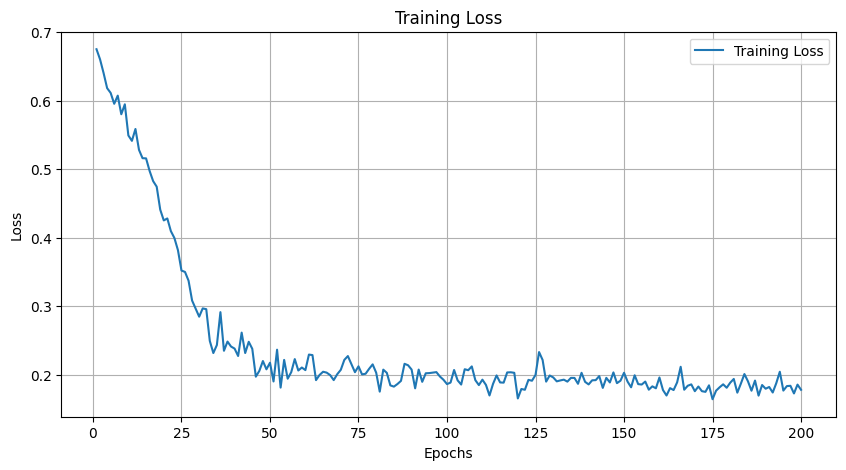

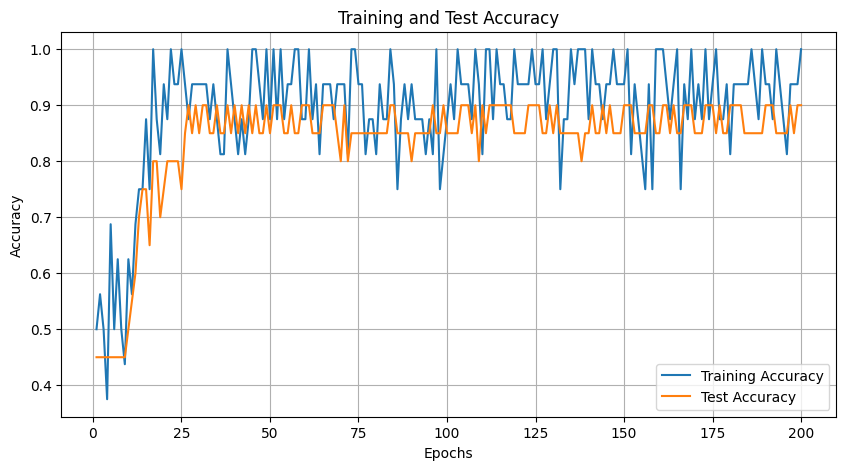

Net(
  (fc1): Linear(in_features=12, out_features=96, bias=True)
  (fc2): Linear(in_features=96, out_features=96, bias=True)
  (fc3): Linear(in_features=96, out_features=96, bias=True)
  (fc4): Linear(in_features=96, out_features=96, bias=True)
  (fc5): Linear(in_features=96, out_features=96, bias=True)
  (fc6): Linear(in_features=96, out_features=96, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc10): Linear(in_features=96, out_features=2, bias=True)
)


In [10]:
#출력이 0 혹은 1이 되게 함
result = torch.max(model(x_test).data,1)[1]

#모형의 정확도 측정
accuracy=sum(y_test.data.numpy()==result.numpy())/len(y_test.data.numpy())

#모형의 정확도 출력
print(accuracy)

# Loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss_avg) + 1), loss_avg, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_acc_list) + 1), train_acc_list, label='Training Accuracy')
plt.plot(range(1, len(test_acc_list) + 1), test_acc_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print(model)